In [1]:
#Logistic regression
from scipy import optimize
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#build logistic regression model to predict weather a student gets admitted based on two exams
#we have data of prev applicants that we can use as training data
#for an applicant we have their scores on two exams and the admission decision
#hence we need to build a classifier that estimates the probability weather an applicant will get admisssion
#based on the scores of the two exams

#load the data
data = np.loadtxt(os.path.join("C:/Users/dynam/Desktop/Coursera AndrewNg/machine-learning-ex2/machine-learning-ex2/ex2",'ex2data1.txt'),delimiter = ',')
X,y = data[:,0:2],data[:,-1]

In [3]:
#visualize data before making any predictions
#on x,y axis we have the marks of the two exams and on the z axis we have the result of the exam
def plotData(X,y):
    #pos_vect and neg_vect are vectors with indices where y == 1 and y == 0
    pos_vect = y == 1
    neg_vect = y == 0

    #X[pos,0],X[pos,1] are elements of the first column and second column of matrix X which have positive output
    #X[neg,0],X[neg,1] are elements of the first and second column of Matrix X which have negetive output

    #plot the examples
    plt.plot(X[pos_vect,0],X[pos_vect,1],'k*',label = "admitted")
    plt.plot(X[neg_vect,0],X[neg_vect,1],'ko',label = "not admitted")
    plt.xlabel("Exam 1 score")
    plt.ylabel("Exam 2 score")
    plt.legend()
    plt.show()

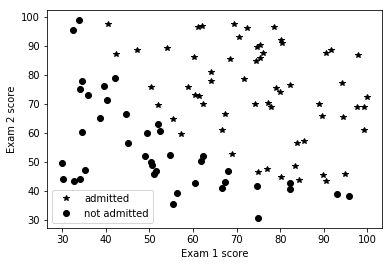

In [4]:
plotData(X,y)

In [5]:
#sigmoid function implentation
def sigmoid(z):
    #converting the input to a numpy array
    z = np.array(z)
    g = np.zeros(z.shape)
    g = 1/(1+np.exp(-z)) #np.exp is used for nmpy exponenetial
    return g

In [6]:
#testing sigmoid fucntion
Z = 0
g = sigmoid(Z)
print("g({}) = {}".format(Z,g))

g(0) = 0.5


In [7]:
#m = #training examples
#n = #features

m,n = X.shape
#ADD ones to axis = 1 ie along rows to X
X = np.concatenate([np.ones((m,1)),X],axis = 1)
print(X.shape)

(100, 3)


In [8]:
#cost function implementation

#theta = (n+1,)
#X = (m,n+1)
#y = (m,)
#grad = (n+1,)
def costFunction(theta,X,y):
    m = y.size #m = #trainig example
    J = 0
    grad = np.zeros(theta.shape)
    hOfTheta = sigmoid(np.dot(X,theta))    
    J = (1/m)*np.sum(np.dot(-y,np.log(hOfTheta)) - np.dot((1-y),np.log(1-hOfTheta)))
    grad = (1/m)*np.dot((hOfTheta - y),X)
    return J,grad

In [9]:
#testing the cost function
init_theta = np.zeros(n+1)
print(init_theta.shape)
cost,grad = costFunction(init_theta,X,y)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print("Gradient at initial theta (zeros):")
print(grad)

(3,)
Cost at initial theta (zeros): 0.693
Gradient at initial theta (zeros):
[ -0.1        -12.00921659 -11.26284221]


In [10]:
%config IPCompleter.greedy=True

In [11]:
#testing cost function for non-zero theta
test_theta = np.array([-24,0.2,0.2])
cost,grad = costFunction(test_theta,X,y)
print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print("Gradient at initial theta (zeros):")
print(grad)

Cost at initial theta (zeros): 0.218
Gradient at initial theta (zeros):
[0.04290299 2.56623412 2.64679737]


In [12]:
#for linear regression,we found out the parameters theta by taking gradient descent steps
#but here we will use scipy.optimize.minimize for optimzation of cost function J(theta) with parameters theta
#Parameters:
#costFunction =>name of the cost that computes theta parameter
#initial_theta =>initial theta values we are trying to optimize
#jac =>Indication if the cost fucntion return jacobian or nor
#method =>optimization algorithm used
#options =>maximum number of iterations

options = {"maxiter" : 400}
#newton algorithm is substitute for advanced optimization algorithm like fminunc of octave
#advanced algorithms like fminunc can replace gradient descent
#the function returns an object
res = optimize.minimize(costFunction,init_theta,(X,y),jac = True,method = "TNC",options = options)

In [13]:
#the fun method of res gives the valuw of the cost fucntion at optimized theta
cost = res.fun
#the optimized theta property is in the x mthod
opt_theta = res.x

print("The optimized cost function value is {}".format(opt_theta))
print("The optimized theta values are ")
print(opt_theta)

The optimized cost function value is [-25.1613187    0.20623159   0.20147149]
The optimized theta values are 
[-25.1613187    0.20623159   0.20147149]


In [14]:
#make the decision boundary using optimized theta


In [15]:
#evaluate logistic regression to predict weather a student will be admitted or not

#Ex:Student 1 : Exam 1 : 45 and Exam 2: 85

#predict weather a label is 0 or 1 using the learned logistic regression
def predict(theta,X):
    #p is an vector with 0 or 1 for each row in x
    m = X.shape[0]
    p = np.zeros(m)
    #calculate g(z) where z = X.theta which is between 0 to 1
    p = sigmoid(np.dot(X,theta))
    return p

In [16]:
#using the funcion to predict

X_pred = np.array([1,45,85])
theta_pred = opt_theta
prob = predict(theta_pred,X_pred)
print("For a student with 45,85,we predict an admissson probability of {:.3f} %".format(prob))

For a student with 45,85,we predict an admissson probability of 0.776 %


In [17]:
#making the classifier
def probClassifier(prob):
    if (prob >= 0.5):
        return "Admitted"
    else:
        return "Not admitted"
print("The student is " + probClassifier(prob))

The student is Admitted


In [18]:
#compute the accuracy on our training set
p = predict(opt_theta,X)
print("Train accuracy {} %".format(np.mean(p)*100))

Train accuracy 60.0000009229095 %


In [19]:
#regularized logistic regression
#we will try to predict weather microchips from a fabrication plant passes quality assurance QA based on the two tests conducted.
import numpy as np
import os

data_rg = np.loadtxt(os.path.join("C:/Users/dynam/Desktop/Coursera AndrewNg/machine-learning-ex2/machine-learning-ex2/ex2",'ex2data2.txt'),delimiter = ',')
X = data_rg[:,:2]
y = data_rg[:,2]

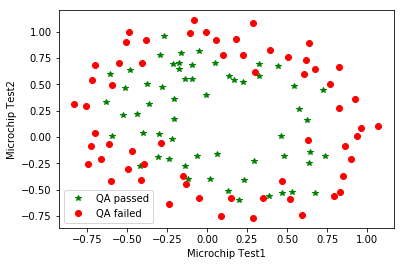

In [20]:
#visualize the data
import matplotlib.pyplot as plt

def plotRgData(X,y):
    pos_vect = y == 1
    neg_vect = y == 0
    plt.plot(X[pos_vect,0],X[pos_vect,1],'g*',label = "QA passed")
    plt.plot(X[neg_vect,0],X[neg_vect,1],'ro',label = "QA failed")
    plt.xlabel("Microchip Test1")
    plt.ylabel("Microchip Test2")
    plt.legend()
    plt.show()
plotRgData(X,y)

In [21]:
#Feature Mapping
#one way to fit the data better is by creating more features from data point
#a logistic regression classifier trained on higher - dimension feature vector will have a complex decision boundary 
#but it is susceptible to overfitting

def mapFeature(X1,X2,degree = 6):
    #X1 is a vector of (m,1) dim of the first feature for all examples
    #X2 is a vwector of (m,1) dim of the secod feature for all examples
    #degree = polynomial degree
    #it map the features into polynomials terms of X1,X2 upto the sixth term
    #it also adds a column of ones 
    
    if X1.ndim > 0:
        out = [np.ones(X1.shape[0])]
    else:
        out = [np.ones(1)]

    for i in range(1, degree + 1):
        for j in range(i + 1):
            out.append((X1 ** (i - j)) * (X2 ** j))

    if X1.ndim > 0:
        return np.stack(out, axis=1)
    else:
        return np.array(out)

In [22]:
X = mapFeature(X[:,0],X[:,1])

In [23]:
#function to compute the cost function for reguarized logistic regression

def costFunctionReg(theta, X, y, lambda_):
    """
    #theta is (n+1,)
    #X is (m,n+1)
    #y is (m,)
    #lambda_ is the regularization parameter
    #J is the regularized cost fucntion value
    #grad is (n+1,) vec which is gradient of the cost fucntion wrt theta
    """
    # Initialize some useful values
    m = y.size  # number of training examples

    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(theta.shape)

    # ===================== YOUR CODE HERE ======================
    h = sigmoid(np.dot(X,theta))
    
    temp = theta
    temp[0] = 0
    
    J = (1/m)*np.sum((np.dot(-y,np.log(h)) - np.dot((1-y),np.log(1-h)))) + (lambda_ / (2*m))*np.sum(np.square(temp))
    
    grad = (1 / m) * np.dot((h-y),X) 
    grad = grad + (lambda_ / m) * temp
    
    # =============================================================
    return J, grad

In [24]:
#calling the costFunctionRegularized using initial value of theta (all zeros) and another test case
initial_theta = np.zeros(X.shape[1])
#set the lambda reg para = 1
lambda_ = 1
cost,grad = costFunctionReg(initial_theta,X,y,lambda_)
print("The cost at initial theta : {:0.2f}".format(cost))
print("First five Gradient at initial value of theta is ")
print(grad[:5])

The cost at initial theta : 0.69
First five Gradient at initial value of theta is 
[8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02]


In [25]:
#test value of theta
test_theta = np.ones(X.shape[1])
lambda_ = 10 #reg param
cost,grad = costFunctionReg(test_theta,X,y,10)
print("Cost at test theta is {}".format(cost))
print("First five Gradient at test value of theta is ")
print(grad[:5])

Cost at test theta is 3.16450933161501
First five Gradient at test value of theta is 
[0.34604507 0.16135192 0.19479576 0.22686278 0.09218568]


In [26]:
#we will use optimize.minimize to learn optimized theta parameter instead of gradient descent
init_theta = np.zeros(X.shape[1])
lambda_ = 1.00
options = {'maxiter' : 100}
res = optimize.minimize(costFunctionReg,init_theta,(X,y,lambda_),jac = True,method = "TNC",options = options)

In [27]:
#the value of cost function
cost = res.fun
#optimal theta
theta = res.x

In [28]:
#plot decision boundary

In [29]:
pred = predict(theta,X)
print("Train Accuracy : {:.2f} %".format(np.mean(pred)*100))

Train Accuracy : 43.04 %
